In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from ucimlrepo import fetch_ucirepo
from sklearn.feature_selection import mutual_info_classif

In [2]:
#1. Wczytanie i filtrowanie danych
polish_companies_bankruptcy = fetch_ucirepo(id=365)

X = polish_companies_bankruptcy.data.features
y = polish_companies_bankruptcy.data.targets
y = y['class']
data = pd.concat([X, y.rename('Bankruptcy')], axis=1)

# Filtrowanie dla konkretnego roku
selected_year = 3
data = data[data['year'] == selected_year]
data = data.drop(columns=['year'])

In [3]:
print(data)

             A1       A2        A3       A4        A5        A6        A7  \
17200  0.174190  0.41299  0.143710  1.34800  -28.9820  0.603830  0.219460   
17201  0.146240  0.46038  0.282300  1.62940    2.5952  0.000000  0.171850   
17202  0.000595  0.22612  0.488390  3.15990   84.8740  0.191140  0.004572   
17203  0.024526  0.43236  0.275460  1.78330  -10.1050  0.569440  0.024526   
17204  0.188290  0.41504  0.342310  1.92790  -58.2740  0.000000  0.233580   
...         ...      ...       ...      ...       ...       ...       ...   
27698  0.002861  0.58067 -0.223860  0.51658  -31.8660  0.002861  0.002861   
27699 -0.051968  0.55254  0.147150  2.16980   12.7480 -0.051968 -0.034361   
27700 -0.135900  0.83954 -0.342010  0.46526 -145.3100 -0.219120 -0.131860   
27701  0.009423  0.50028  0.261630  1.52300  -10.1580  0.009423  0.007700   
27702 -0.001775  0.94780  0.003729  1.00450  -50.2210  0.000000  0.002565   

             A8       A9       A10  ...       A56       A57      A58  \
172

In [4]:
 # 2. Podstawowa eksploracja danych

print("\nPodstawowe informacje o danych:")
data.info()

print("\nPodstawowe statystyki opisowe:")
print(data.describe())

print("\nRozkład klas w kolumnie 'Bankruptcy':")
print(data['Bankruptcy'].value_counts())


Podstawowe informacje o danych:
<class 'pandas.core.frame.DataFrame'>
Index: 10503 entries, 17200 to 27702
Data columns (total 65 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   A1          10503 non-null  float64
 1   A2          10503 non-null  float64
 2   A3          10503 non-null  float64
 3   A4          10485 non-null  float64
 4   A5          10478 non-null  float64
 5   A6          10503 non-null  float64
 6   A7          10503 non-null  float64
 7   A8          10489 non-null  float64
 8   A9          10500 non-null  float64
 9   A10         10503 non-null  float64
 10  A11         10503 non-null  float64
 11  A12         10485 non-null  float64
 12  A13         10460 non-null  float64
 13  A14         10503 non-null  float64
 14  A15         10495 non-null  float64
 15  A16         10489 non-null  float64
 16  A17         10489 non-null  float64
 17  A18         10503 non-null  float64
 18  A19         10460 non-null  float6

In [5]:
# 3. Obsługa braków danych

# Sprawdzenie braków w 'Bankruptcy'
print(f"Liczba braków w 'Bankruptcy' przed usunięciem: {data['Bankruptcy'].isnull().sum()}")
data = data.dropna(subset=['Bankruptcy'])
print(f"Liczba braków w 'Bankruptcy' po usunięciu: {data['Bankruptcy'].isnull().sum()}")

data.reset_index(drop=True, inplace=True)

# Sprawdzenie braków przed usuwaniem kolumn
missing_values = data.isnull().sum()
missing_percentage = (missing_values / len(data)) * 100
print("\nProcent braków w danych (przed usuwaniem kolumn):")
print(missing_percentage[missing_percentage > 0])

# Usuwanie kolumn z dużą liczbą braków (>40%)
threshold = 40
cols_to_drop = missing_percentage[missing_percentage > threshold].index
print(f"\nKolumny do usunięcia z powodu dużej liczby braków: {cols_to_drop}")
data = data.drop(columns=cols_to_drop)

# Sprawdzenie braków po usunięciu kolumn
missing_values = data.isnull().sum()
print("\nLiczba braków po usunięciu kolumn:")
print(missing_values[missing_values > 0])

# Wypełnianie braków medianą w pozostałych kolumnach
for col in data.columns:
    if data[col].isnull().sum() > 0:
        data[col].fillna(data[col].median(), inplace=True)

# Weryfikacja braków po przetwarzaniu
print("\nLiczba braków danych po przetwarzaniu:", data.isnull().sum().sum())  # Powinno być 0
data.reset_index(drop=True, inplace=True)

Liczba braków w 'Bankruptcy' przed usunięciem: 0
Liczba braków w 'Bankruptcy' po usunięciu: 0

Procent braków w danych (przed usuwaniem kolumn):
A4      0.171380
A5      0.238027
A8      0.133295
A9      0.028563
A12     0.171380
A13     0.409407
A15     0.076169
A16     0.133295
A17     0.133295
A19     0.409407
A20     0.409407
A21     7.683519
A23     0.409407
A24     2.161287
A26     0.133295
A27     6.807579
A28     2.170808
A30     0.409407
A31     0.409407
A32     0.961630
A33     0.171380
A34     0.133295
A37    45.091879
A39     0.409407
A40     0.171380
A41     1.923260
A42     0.409407
A43     0.409407
A44     0.409407
A45     5.626964
A46     0.171380
A47     0.818814
A49     0.409407
A50     0.133295
A52     0.818814
A53     2.170808
A54     2.170808
A56     0.409407
A58     0.276112
A60     5.636485
A61     0.161859
A62     0.409407
A63     0.171380
A64     2.170808
dtype: float64

Kolumny do usunięcia z powodu dużej liczby braków: Index(['A37'], dtype='object')

Liczba b

/var/folders/9x/6yf3r7z10g73l5dxc01zpcm00000gn/T/ipykernel_68822/2524175795.py:30: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].median(), inplace=True)
/var/folders/9x/6yf3r7z10g73l5dxc01zpcm00000gn/T/ipykernel_68822/2524175795.py:30: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values 


Rozkład klas w zbiorze danych:
Bankruptcy
0    10008
1      495
Name: count, dtype: int64


/var/folders/9x/6yf3r7z10g73l5dxc01zpcm00000gn/T/ipykernel_68822/1895044350.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_distribution.index, y=class_distribution.values, palette="viridis")


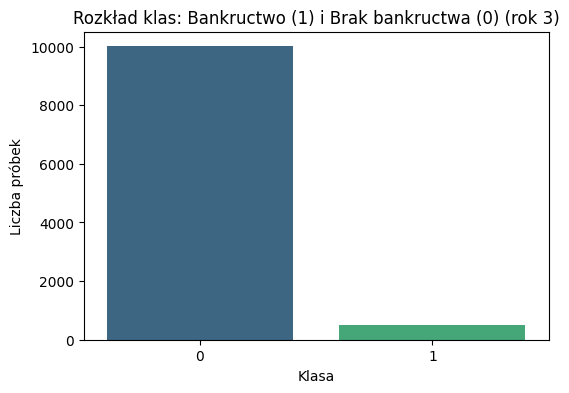

In [6]:
#4. Analiza rozkładu klasy

class_distribution = data['Bankruptcy'].value_counts()
print("\nRozkład klas w zbiorze danych:")
print(class_distribution)

# Próba jest niezbilansowana
plt.figure(figsize=(6, 4))
sns.barplot(x=class_distribution.index, y=class_distribution.values, palette="viridis")
plt.title(f'Rozkład klas: Bankructwo (1) i Brak bankructwa (0) (rok {selected_year})')
plt.xlabel('Klasa')
plt.ylabel('Liczba próbek')
plt.show()

In [8]:
#5. Skalowanie cech
scaler = MinMaxScaler()
features = data.drop(columns=['Bankruptcy'])
scaled_features = pd.DataFrame(scaler.fit_transform(features), columns=features.columns)

# Dodanie klasy 'Bankruptcy' z powrotem
data = pd.concat([scaled_features, data['Bankruptcy']], axis=1)
print(data)

             A1        A2        A3        A4        A5        A6        A7  \
0      0.253983  0.000859  0.964690  0.000025  0.945568  0.918850  0.254627   
1      0.253586  0.000958  0.964969  0.000030  0.945570  0.917759  0.253950   
2      0.251515  0.000470  0.965383  0.000059  0.945577  0.918104  0.251572   
3      0.251856  0.000899  0.964955  0.000033  0.945569  0.918787  0.251856   
4      0.254184  0.000863  0.965090  0.000036  0.945565  0.917759  0.254827   
...         ...       ...       ...       ...       ...       ...       ...   
10498  0.251548  0.001208  0.963952  0.000010  0.945568  0.917764  0.251548   
10499  0.250768  0.001149  0.964697  0.000041  0.945571  0.917665  0.251018   
10500  0.249575  0.001746  0.963714  0.000009  0.945559  0.917363  0.249632   
10501  0.251641  0.001041  0.964928  0.000028  0.945569  0.917776  0.251616   
10502  0.251482  0.001972  0.964409  0.000019  0.945566  0.917759  0.251543   

             A8        A9       A10  ...       A56 


Najsilniejsze korelacje cech z klasą 'Bankruptcy':
Bankruptcy    1.000000
A2            0.035560
A51           0.034146
A33           0.022489
A36           0.020230
A30           0.008076
A62           0.007016
A15           0.004523
A31           0.004025
A23           0.003624
Name: Bankruptcy, dtype: float64


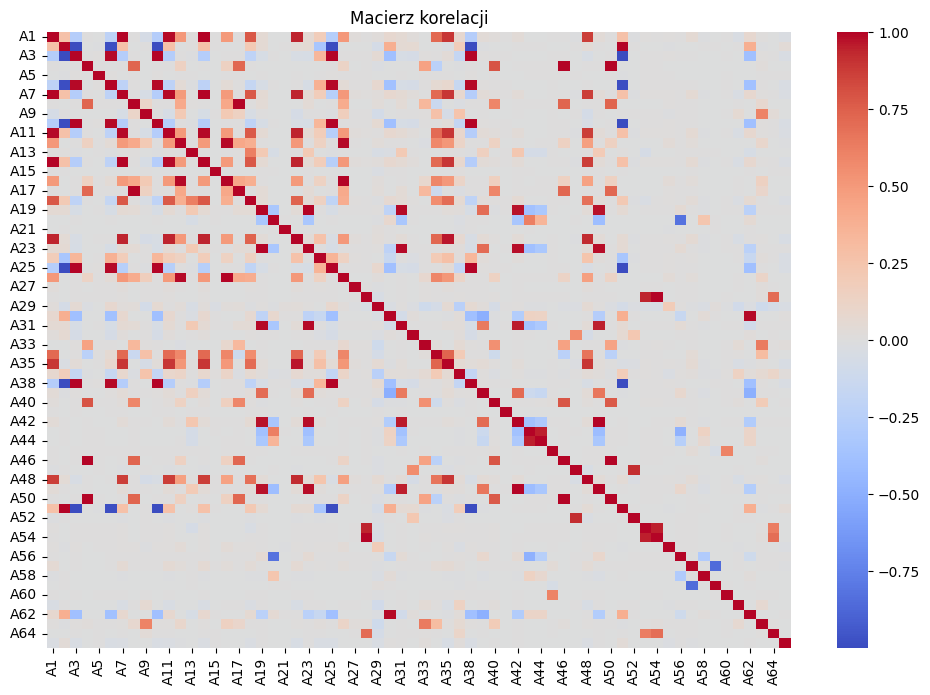

In [9]:
# 5. Korelacja między cechami a klasą

correlations = data.corr()['Bankruptcy'].sort_values(ascending=False)
print("\nNajsilniejsze korelacje cech z klasą 'Bankruptcy':")
print(correlations.head(10))

# Wizualizacja macierzy korelacji
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=False, cmap='coolwarm', cbar=True)
plt.title("Macierz korelacji")
plt.show()

In [12]:
# 6. Mutual Information jako alternatywa dla korelacji liniowej

X = data.drop(columns=['Bankruptcy'])
y = data['Bankruptcy']
mutual_info = mutual_info_classif(X, y, random_state=42)
mutual_info_series = pd.Series(mutual_info, index=X.columns).sort_values(ascending=False)
print("\nCechy o najwyższej informacji wzajemnej względem klasy 'Bankruptcy':")
print(mutual_info_series.head(10))


Cechy o najwyższej informacji wzajemnej względem klasy 'Bankruptcy':
A27    0.020595
A24    0.014255
A13    0.013684
A26    0.012753
A46    0.012479
A42    0.011817
A23    0.011516
A41    0.011492
A45    0.011457
A38    0.011357
dtype: float64


In [13]:
#7. Podział na zbiór treningowy i testowy

X = data.drop(columns=['Bankruptcy'])  # Cechy
y = data['Bankruptcy']  # Klasa docelowa

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [14]:
#8. Wyrównanie klas za pomocą SMOTE na zbiorze treningowym

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
print("\nRozkład klas po zastosowaniu SMOTE:")
print(y_train_resampled.value_counts())

# Weryfikacja liczby próbek
print(f"Liczba próbek w zbiorze treningowym po SMOTE: {X_train_resampled.shape[0]}")


Rozkład klas po zastosowaniu SMOTE:
Bankruptcy
0    8006
1    8006
Name: count, dtype: int64
Liczba próbek w zbiorze treningowym po SMOTE: 16012
